In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.feature_selection import f_classif,chi2

In [7]:
df= pd.read_csv('adult.csv')

In [9]:
df.shape

(32561, 15)

In [10]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(24)

In [14]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [19]:
df.income=np.where(df.income=='>50K',1,0)

In [20]:
df.income.unique()

array([0, 1])

In [21]:
target= df[['income']]
features= df.drop(columns=['income'])

In [22]:
features.shape

(32537, 14)

In [23]:
features.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'],
      dtype='object')

In [28]:
cat_col= [i for i in features.columns if features[i].dtype=='O']
num_col= [i for i in features.columns if features[i].dtype!='O']
print(cat_col)
print(num_col)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [32]:
df1=features[num_col]
df2=features[cat_col]

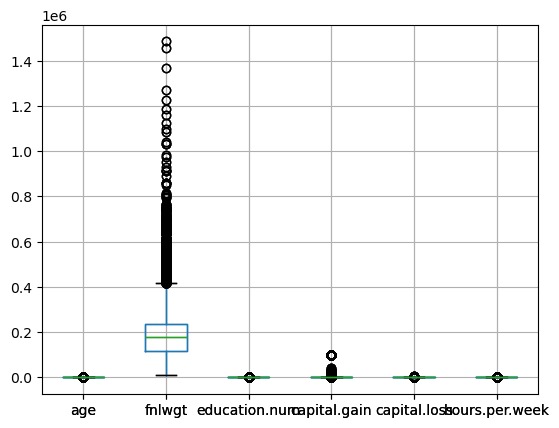

In [36]:
df1.boxplot()
plt.show()

In [37]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    ## df[column]= df[column].apply(lambda x:x if x>=lower_extreme else x if x<= upper_extreme) 
    df[column]= df[column].apply(lambda x:lower_extreme if x<lower_extreme else upper_extreme if x> upper_extreme else x) 
for col in df1.select_dtypes(['int','float']).columns:
    outlier_capping(df1,col)

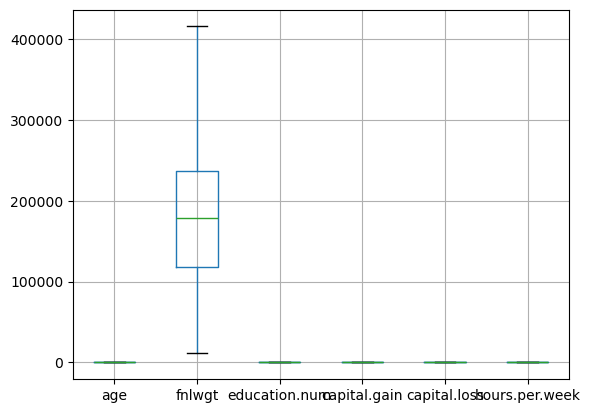

In [38]:
df1.boxplot()
plt.show()

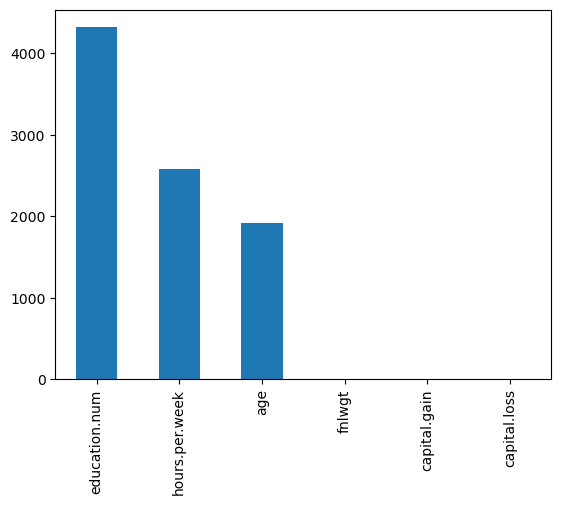

In [43]:
#### feature selection
f_class= f_classif(df1,target)
pd.Series(f_class[0],index=df1.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()